In [53]:
from platform import python_version

print(python_version())

3.8.8


# Make sure the version of anaconda is the latest 

In [54]:
import sklearn  # importing sklearn
print(sklearn.__version__)  # printing sklearn version

0.24.1


## Importing the relevent libraries

In [55]:
import nltk # importing natural language processing toolkit 
from nltk.corpus import stopwords  # helps remove stopwords
from nltk.stem import WordNetLemmatizer # lemmantizes words
from nltk.corpus import wordnet  # will be used to replace words with there antonyms
from nltk.stem import PorterStemmer  # stemms words

In [56]:
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [57]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [60]:
pip install auto-sklearn

  Using cached auto-sklearn-0.14.2.tar.gz (6.3 MB)
  Using cached auto-sklearn-0.14.1.tar.gz (6.3 MB)
  Using cached auto-sklearn-0.14.0.tar.gz (6.3 MB)
  Using cached auto-sklearn-0.13.0.tar.gz (6.3 MB)
  Using cached auto-sklearn-0.12.7.tar.gz (6.3 MB)
  Using cached auto-sklearn-0.12.6.tar.gz (6.1 MB)
  Using cached auto-sklearn-0.12.5.tar.gz (6.1 MB)
  Using cached auto-sklearn-0.12.4.tar.gz (6.1 MB)
  Using cached auto-sklearn-0.12.3.tar.gz (6.1 MB)
  Using cached auto-sklearn-0.12.2.tar.gz (6.1 MB)
  Using cached auto-sklearn-0.12.1.tar.gz (6.1 MB)
  Using cached auto-sklearn-0.12.0.tar.gz (4.1 MB)
  Using cached auto-sklearn-0.11.1.tar.gz (3.9 MB)
  Using cached auto-sklearn-0.11.0.tar.gz (3.9 MB)
  Using cached auto-sklearn-0.10.0.tar.gz (4.1 MB)
  Using cached auto-sklearn-0.9.0.tar.gz (4.7 MB)
  Using cached auto-sklearn-0.8.0.tar.gz (4.6 MB)
  Using cached auto-sklearn-0.7.1.tar.gz (4.6 MB)
  Using cached auto-sklearn-0.7.0.tar.gz (4.6 MB)
  Using cached auto-sklearn-0.6.0.t

    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\User\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\User\\AppData\\Local\\Temp\\pip-install-bkgpdkkr\\auto-sklearn_06c53985df82414da78517b48d25888e\\setup.py'"'"'; __file__='"'"'C:\\Users\\User\\AppData\\Local\\Temp\\pip-install-bkgpdkkr\\auto-sklearn_06c53985df82414da78517b48d25888e\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\User\AppData\Local\Temp\pip-pip-egg-info-fsf4hfgz'
         cwd: C:\Users\User\AppData\Local\Temp\pip-install-bkgpdkkr\auto-sklearn_06c53985df82414da78517b48d25888e\
    Complete output (5 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\User\AppData\Local\Temp\pip-install-bkgpdkkr\auto-sklearn_06c53985df82414da78517b48d25888e\

  copying autosklearn\pipeline\components\feature_preprocessing\select_percentile_regression.py -> build\lib.win-amd64-3.8\autosklearn\pipeline\components\feature_preprocessing
  copying autosklearn\pipeline\components\feature_preprocessing\select_rates.py -> build\lib.win-amd64-3.8\autosklearn\pipeline\components\feature_preprocessing
  copying autosklearn\pipeline\components\feature_preprocessing\truncatedSVD.py -> build\lib.win-amd64-3.8\autosklearn\pipeline\components\feature_preprocessing
  copying autosklearn\pipeline\components\feature_preprocessing\__init__.py -> build\lib.win-amd64-3.8\autosklearn\pipeline\components\feature_preprocessing
  creating build\lib.win-amd64-3.8\autosklearn\pipeline\components\regression
  copying autosklearn\pipeline\components\regression\adaboost.py -> build\lib.win-amd64-3.8\autosklearn\pipeline\components\regression
  copying autosklearn\pipeline\components\regression\ard_regression.py -> build\lib.win-amd64-3.8\autosklearn\pipeline\components\r

In [61]:
!sudo apt-get install build-essential swig


  creating build\lib.win-amd64-3.8\autosklearn\metalearning\files\f1_micro_binary.classification_dense
  copying autosklearn\metalearning\files\f1_micro_binary.classification_dense\algorithm_runs.arff -> build\lib.win-amd64-3.8\autosklearn\metalearning\files\f1_micro_binary.classification_dense
  copying autosklearn\metalearning\files\f1_micro_binary.classification_dense\configurations.csv -> build\lib.win-amd64-3.8\autosklearn\metalearning\files\f1_micro_binary.classification_dense
  copying autosklearn\metalearning\files\f1_micro_binary.classification_dense\description.txt -> build\lib.win-amd64-3.8\autosklearn\metalearning\files\f1_micro_binary.classification_dense
  copying autosklearn\metalearning\files\f1_micro_binary.classification_dense\feature_costs.arff -> build\lib.win-amd64-3.8\autosklearn\metalearning\files\f1_micro_binary.classification_dense
  copying autosklearn\metalearning\files\f1_micro_binary.classification_dense\feature_runstatus.arff -> build\lib.win-amd64-3.8\au

  copying autosklearn\metalearning\files\recall_macro_binary.classification_sparse\algorithm_runs.arff -> build\lib.win-amd64-3.8\autosklearn\metalearning\files\recall_macro_binary.classification_sparse
  copying autosklearn\metalearning\files\recall_macro_binary.classification_sparse\configurations.csv -> build\lib.win-amd64-3.8\autosklearn\metalearning\files\recall_macro_binary.classification_sparse
  copying autosklearn\metalearning\files\recall_macro_binary.classification_sparse\description.txt -> build\lib.win-amd64-3.8\autosklearn\metalearning\files\recall_macro_binary.classification_sparse
  copying autosklearn\metalearning\files\recall_macro_binary.classification_sparse\feature_costs.arff -> build\lib.win-amd64-3.8\autosklearn\metalearning\files\recall_macro_binary.classification_sparse
  copying autosklearn\metalearning\files\recall_macro_binary.classification_sparse\feature_runstatus.arff -> build\lib.win-amd64-3.8\autosklearn\metalearning\files\recall_macro_binary.classifica

In [62]:
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install


  copying autosklearn\metalearning\files\recall_weighted_binary.classification_sparse\algorithm_runs.arff -> build\lib.win-amd64-3.8\autosklearn\metalearning\files\recall_weighted_binary.classification_sparse
  copying autosklearn\metalearning\files\recall_weighted_binary.classification_sparse\configurations.csv -> build\lib.win-amd64-3.8\autosklearn\metalearning\files\recall_weighted_binary.classification_sparse
  copying autosklearn\metalearning\files\recall_weighted_binary.classification_sparse\description.txt -> build\lib.win-amd64-3.8\autosklearn\metalearning\files\recall_weighted_binary.classification_sparse
  copying autosklearn\metalearning\files\recall_weighted_binary.classification_sparse\feature_costs.arff -> build\lib.win-amd64-3.8\autosklearn\metalearning\files\recall_weighted_binary.classification_sparse
  copying autosklearn\metalearning\files\recall_weighted_binary.classification_sparse\feature_runstatus.arff -> build\lib.win-amd64-3.8\autosklearn\metalearning\files\re

  copying sklearn\datasets\lfw.py -> build\lib.win-amd64-3.8\sklearn\datasets
  copying sklearn\datasets\mlcomp.py -> build\lib.win-amd64-3.8\sklearn\datasets
  copying sklearn\datasets\mldata.py -> build\lib.win-amd64-3.8\sklearn\datasets
  copying sklearn\datasets\olivetti_faces.py -> build\lib.win-amd64-3.8\sklearn\datasets
  copying sklearn\datasets\rcv1.py -> build\lib.win-amd64-3.8\sklearn\datasets
  copying sklearn\datasets\samples_generator.py -> build\lib.win-amd64-3.8\sklearn\datasets
  copying sklearn\datasets\setup.py -> build\lib.win-amd64-3.8\sklearn\datasets
  copying sklearn\datasets\species_distributions.py -> build\lib.win-amd64-3.8\sklearn\datasets
  copying sklearn\datasets\svmlight_format.py -> build\lib.win-amd64-3.8\sklearn\datasets
  copying sklearn\datasets\twenty_newsgroups.py -> build\lib.win-amd64-3.8\sklearn\datasets
  copying sklearn\datasets\__init__.py -> build\lib.win-amd64-3.8\sklearn\datasets
  creating build\lib.win-amd64-3.8\sklearn\datasets\tests
 

In [ ]:
!pip install auto-sklearn


  copying sklearn\externals\joblib\func_inspect.py -> build\lib.win-amd64-3.8\sklearn\externals\joblib
  copying sklearn\externals\joblib\hashing.py -> build\lib.win-amd64-3.8\sklearn\externals\joblib
  copying sklearn\externals\joblib\logger.py -> build\lib.win-amd64-3.8\sklearn\externals\joblib
  copying sklearn\externals\joblib\memory.py -> build\lib.win-amd64-3.8\sklearn\externals\joblib
  copying sklearn\externals\joblib\my_exceptions.py -> build\lib.win-amd64-3.8\sklearn\externals\joblib
  copying sklearn\externals\joblib\numpy_pickle.py -> build\lib.win-amd64-3.8\sklearn\externals\joblib
  copying sklearn\externals\joblib\numpy_pickle_compat.py -> build\lib.win-amd64-3.8\sklearn\externals\joblib
  copying sklearn\externals\joblib\numpy_pickle_utils.py -> build\lib.win-amd64-3.8\sklearn\externals\joblib
  copying sklearn\externals\joblib\parallel.py -> build\lib.win-amd64-3.8\sklearn\externals\joblib
  copying sklearn\externals\joblib\pool.py -> build\lib.win-amd64-3.8\sklearn\e

## Sklearn automl

In [ ]:
import numpy as np  # Allows us to work with arrays.
import pandas as pd  # importing pandas’ library for use. Allows us to import data set and manipulate it.
import string  # import string library function
import re  # works with Regular Expressions
import pickle  # allows to open and save to files
from nltk.tokenize import word_tokenize  # tokenizes sentences.

import seaborn as sns  # Allows to polt beautiful plots.
import matplotlib.pyplot as plt  # Allows working with plots.
from mpl_toolkits import mplot3d  # plotting 3d plots

from sklearn.compose import ColumnTransformer  # helps with encoding.
from sklearn.preprocessing import OneHotEncoder  # Does onehotencode.
from sklearn.preprocessing import LabelEncoder   # Does 1 and 0 encoding.
from sklearn.model_selection import train_test_split  # Splits dataset into test set and traning set. 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer  # Perform the feature scaling.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, multilabel_confusion_matrix  # creates a 
                                                                            # confusion matrix  # creates a confusion matrix
from sklearn.metrics import accuracy_score  # Returns accury score of a model.
from collections import Counter  # Allows the counting the items in an iterable list.

from sklearn.model_selection import cross_val_score  # performs cross validation. Helps in model selection.
from sklearn.model_selection import GridSearchCV  # helps select the best hyper parameters
# from imblearn.over_sampling import RandomOverSampler  # Uses over sampling techniques to Sample the data correctly.
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, roc_auc_score, f1_score 
                                                                                 # Allows the usage of a classification report
    
from sklearn.metrics import precision_recall_fscore_support  # gives precison, recall, f1 score, and support
from sklearn.model_selection import RandomizedSearchCV  # performs randomized search cv


import warnings  # allows to ignore warnings
warnings.filterwarnings("ignore")  # ignores warnings

#%matplotlib inline  # helps in showing plots on the browser.### Importing the relevent libraries

In [ ]:
import autosklearn.classification # autosklearn classifier 

## Importing the dataframe

In [ ]:
DataFrame = pd.read_csv("FinalBalancedDataset.csv")  # opens csv files and assighns them to a variable.

# Checking the data from the dataframe before pre-processing

In [ ]:
DataFrame.head(5)  # Taking a look at the dataframe the first elements of the dataset.

In [ ]:
DataFrame = DataFrame.drop('Unnamed: 0', 1)  # column is dropped

In [ ]:
DataFrame.info()  # checking Basic information on the dataframe being procesed.

## 1. Data pre-processing

In [ ]:
DataFrame.shape  # The Entries and the columns of the dataframe are viewed.

## Dealing with null values

In [ ]:
sns.heatmap(DataFrame.isnull())  # shows null values

In [ ]:
DataFrame.isnull().sum()  # Checking the dataframe for null values.

## Dealing with duplicates

In [ ]:
DataFrame.drop_duplicates(inplace = True)  # checks for duplicates and removes them

In [ ]:
print(DataFrame.pivot_table(columns=['Toxicity'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

In [ ]:
DataFrame.info()  # checking basic information on dataframe

## Balancing DataFrame

In [ ]:
print(DataFrame.pivot_table(columns=['Toxicity'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

In [ ]:
zero = str(round(100 * (30389/56745),2)) + "%"   # percentage of the value is checked from label column.
one  = str(round(100 * (23924/56745),2)) + "%"  # percentage of the value is checked from label column.

In [ ]:
print("0 is represented ", zero, "\n1 is represented ", one)
# percentage of the value is printed of label column.

In [ ]:
30389 - 23924

In [ ]:
row_to_remove = np.random.RandomState(1).choice(DataFrame[DataFrame['Toxicity']==0].index,size=6465,replace=False)
DataFrame = DataFrame.drop(row_to_remove)

In [ ]:
print(DataFrame.pivot_table(columns=['Toxicity'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

# Reseting index

In [ ]:
DataFrame.reset_index(drop=True, inplace=True)  # reseting index.

In [ ]:
DataFrame

In [ ]:
DataFrame.info()  # checking basic information on dataframe

## removing non word symbols

In [ ]:
DataFrame['tweet'] = DataFrame['tweet'].str.replace('[^\w\s]','')
DataFrame.head()

## Removing most frequent words

In [ ]:
freq = pd.Series(' '.join(DataFrame['tweet']).split()).value_counts()[:10]
freq

In [ ]:
freq = pd.Series(' '.join(DataFrame['tweet']).split()).value_counts()[:5]
freq

In [ ]:
DataFrame['tweet'] = DataFrame['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
DataFrame.head()

## Removing the rare words

In [ ]:
freq = pd.Series(' '.join(DataFrame['tweet']).split()).value_counts()[-15:]
freq

In [ ]:
DataFrame['tweet'] = DataFrame['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
DataFrame.head()

## Label Encoding

In [ ]:
le = LabelEncoder()  # creating the instance of the object.
DataFrame.Toxicity = le.fit_transform(DataFrame.Toxicity)  # label encoing the require dcolumn.

## Spliting X and y variables.

In [ ]:
X = DataFrame.iloc[:, -1].values  # selecting the values for the X variable.

In [ ]:
y = DataFrame.iloc[:, :-1].values # selecting the values for the Y variable. # done using .to_numpy and not 
                                                       # .iloc as .to_numpy creates a horizontal bar while .iloc creates a 
                                                       # horizontal bar which will not alighn with the x values.

In [ ]:
print("X ", X, "y ", y)  # priting arrays

## Removing punctuations, special character and converting text to lower case

In [ ]:
no_punctuation_and_no_stop_words = []
for i in range(0,len(X)):
  # removing non word symbols
  data = re.sub(r'\W',' ', str(X[i]))
  # converting the data to lower case
  data = data.lower()
  # removing single characters
  data = re.sub(r'\s+[a-z]\s+', ' ', data)
  # removing single characters at the start of a sentence
  data = re.sub(r'^[a-z]\s+',' ',data)
  #replacing everything other than alphabets with a space
  data =re.sub("[^a-zA-Z]"," ",data)
  # removing extra spaces
  data = re.sub(r'\s+',' ', data)
  no_punctuation_and_no_stop_words.append(data)

In [ ]:
no_punctuation_and_no_stop_words

## Removing stop words

In [ ]:
# removing stop words
tokenized_words = [word_tokenize(str(i)) for i in no_punctuation_and_no_stop_words]
stopset = set(stopwords.words('english'))
clean_model = []
for m in range(len(tokenized_words)):
      stop_m = [i for i in tokenized_words[m] if i not in stopset]
      clean_model.append(' '.join(stop_m))

## Clean sentences model

In [ ]:
clean_model

## Replacing words starting with not with there antonym (Will do after to see if further improvements can be made)

In [ ]:
# tokenized_words = [word_tokenize(str(i)) for i in clean_model]
# temp_word = ""
# model_after_antonyms_replacement = []
# for m in range(len(tokenized_words)):
#   final_word = []
#   for n in range(len(tokenized_words[m])):
#     antonyms = []
#     # replacing not with not_
#     if tokenized_words[m][n] == "not":
#       temp_word = "not_"
#     # replacing word starting with not_ with its antonym
#     elif temp_word == "not_":
#       for sys in wordnet.synsets(tokenized_words[m][n]):
#         for s in sys.lemmas():
#           for a in s.antonyms(): 
#             antonyms.append(a.name())
#       # adding antonym word to original word
#       if len(antonyms) >= 1:
#           tokenized_words[m][n] = antonyms[0]
#       # adding not_ to original word
#       else:
#         if tokenized_words[m][n] != tokenized_words[m][-1]:
#           tokenized_words[m][n+1] = temp_word + tokenized_words[m][n+1]
#       temp_word = ""
#     if tokenized_words[m][n] != "not":
#           final_word.append(tokenized_words[m][n])
#   model_after_antonyms_replacement.append(' '.join(final_word))        

In [ ]:
# clean_model = model_after_antonyms_replacement
# clean_model

## Lemmatization

In [ ]:
tokenized_words = [word_tokenize(str(i)) for i in clean_model]
lemmatizer = WordNetLemmatizer()
lematized_model = []
for m in range(len(tokenized_words)):
      lema_m = [lemmatizer.lemmatize(word) for word in tokenized_words[m]]
      lematized_model.append(' '.join(lema_m))

## Lemmatized model

In [ ]:
lematized_model

In [ ]:
print(lematized_model)

In [ ]:
type(lematized_model)

In [ ]:
type(X)

In [ ]:
# lematized_model = np.array(lematized_model)

In [ ]:
type(lematized_model)

In [ ]:
len(lematized_model)

In [ ]:
len(y)

In [ ]:
lematized_model

In [59]:
print(X)  # priting arrays

['when father is dysfunctional and is so selfish he drags his kids into his dysfunction run'
 'thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx disapointed getthanked'
 'model i love u take with u all time in urð ðððð ððð' ...
 'young buck wanna eat dat nigguh like I aint fuckin dis up again'
 'youu got wild bitches tellin lies'
 'Ruffled Ntac Eileen Dahlia Beautiful color combination of pink orange yellow amp white A Coll httptcoH0dYEBvnZB']


# Encoding

# TF-IDF model

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(max_features = 1000)
tfv_X = tfv.fit_transform(lematized_model).toarray()

# Spliting in traning and testing sets

In [68]:
tfv_X_train, tfv_X_test, tfv_y_train, tfv_y_test = train_test_split(tfv_X, y, test_size = 0.2, random_state = 1)
# test_size = 0.2               # splitting the data into 80 and 20 percent between the training and test set           
                                            # to get the best results.                                                           
# random_state = 1         # resetting the  random seed

In [69]:
# print the lenghth of both test and train set to see if there equally split.
print("The length of X_train is ",len(tfv_X_train), " and the length of y_train is ", len(tfv_y_train))  
print("The length of X_test is ",len(tfv_X_test), " and the length of y_test is ", len(tfv_y_test))

The length of X_train is  38278  and the length of y_train is  38278
The length of X_test is  9570  and the length of y_test is  9570


## Sklearn automl

In [70]:
def sklearn_automl_fun(X_train, y_train,  X_test, y_test):

  # fitting the model
  automl = autosklearn.classification.AutoSklearnClassifier()
  automl.fit(X_train, y_train)

    
  # all models used 
  print("\nclassifiers used: ", set(automl.cv_results_['param_classifier:__choice__']))


  # best model + params
  print("\nbest models and params ")
  print(automl.cv_results_['params'][np.argmax(automl.cv_results_['mean_test_score'])])

  # basic info on the automl
  print("\n", automl.sprint_statistics())

  y_test_pred = automl.predict(X_test)  # predicted results
  
  # Making a confusion matrix
  sns.set(font_scale=1.4)
  sns.heatmap(pd.DataFrame(sklearn.metrics.confusion_matrix(y_test, y_test_pred)), annot=True, annot_kws={"size": 16}, fmt='')
  plt.show()


classifiers used:  {'random_forest', 'libsvm_svc', 'extra_trees', 'adaboost', 'liblinear_svc', 'k_nearest_neighbors', 'gradient_boosting', 'passive_aggressive', 'gaussian_nb', 'mlp', 'bernoulli_nb', 'decision_tree', 'lda', 'sgd', 'qda'}

best models and params 
{'balancing:strategy': 'weighting', 'classifier:__choice__': 'liblinear_svc', 'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:liblinear_svc:C': 0.5897741347520115, 'classifier:liblinear_svc:dual': 'False', 'classifier:liblinear_svc:fit_intercept': 'True', 'classifier:liblinear_svc:intercept_scaling': 1, 'classifier:liblinear_svc:loss': 'squared_hinge', 'classifier:liblinear_svc:multi_class': 'ovr', 'classifier:liblinear_svc:penalty': 'l2', 'classifier:liblinear_svc:tol': 8.817040178738357e-05, 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_c

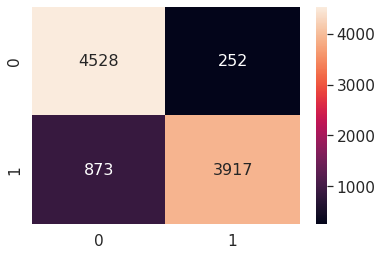

In [71]:
sklearn_automl_fun(tfv_X_train, tfv_y_train,  tfv_X_test, tfv_y_test)

## N-gram Model

In [59]:
from sklearn.feature_extraction.text import CountVectorizer  # bag of words model.

In [60]:
cv = CountVectorizer(ngram_range=(2,2), max_features = 1000)
cv_X = cv.fit_transform(lematized_model).toarray()

In [61]:
cv_X_train, cv_X_test, cv_y_train, cv_y_test = train_test_split(cv_X, y, test_size = 0.2, random_state = 1)
# test_size = 0.2               # splitting the data into 80 and 20 percent between the training and test set           
                                            # to get the best results.                                                           
# random_state = 1         # resetting the  random seed

In [63]:
# print the lenghth of both test and train set to see if there equally split.
print("The length of X_train is ",len(cv_X_train), " and the length of y_train is ", len(cv_y_train))  
print("The length of X_test is ",len(cv_X_test), " and the length of y_test is ", len(cv_y_test))

The length of X_train is  38278  and the length of y_train is  38278
The length of X_test is  9570  and the length of y_test is  9570


[WARNING] [2022-01-07 16:23:46,531:Client-AutoML(1):2f9a0fd8-6fd6-11ec-97b5-0242ac1c0002] Unknown dtype for X: int64, assuming it takes 8 bit/number

classifiers used:  {'random_forest', 'libsvm_svc', 'extra_trees', 'adaboost', 'liblinear_svc', 'k_nearest_neighbors', 'gradient_boosting', 'passive_aggressive', 'gaussian_nb', 'mlp', 'multinomial_nb', 'bernoulli_nb', 'decision_tree', 'lda', 'sgd', 'qda'}

best models and params 
{'balancing:strategy': 'none', 'classifier:__choice__': 'random_forest', 'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'True', 'classifier:random_forest:criterion': 'gini', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.5, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 1, 'classifier:random_forest:min_samples_split': 2, 'classi

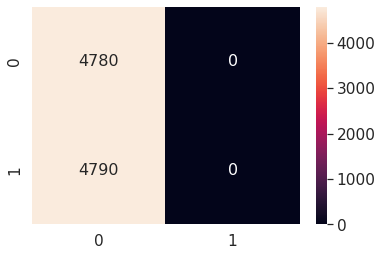

In [66]:
sklearn_automl_fun(cv_X_train, cv_y_train,  cv_X_test, cv_y_test)